In [1]:
# import the stuff
from cetsp_bnb2.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*0.4, y*0.4), 1) for x in range(16) for y in range(16)]
instance = Instance(circles)

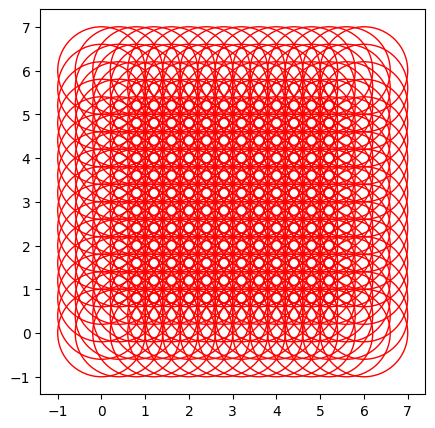

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [4]:
# trigger_lazy_computation an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-8559U CPU @ 2.70GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1024 rows, 1792 columns and 2560 nonzeros
Model fingerprint: 0xbfe9cb57
Model has 512 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e-01, 6e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 512 rows and 512 columns
Presolve time: 0.00s
Presolved: 768 rows, 1536 columns, 1792 nonzeros
Presolved model has 512 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.304e+03
 Factor NZ  : 1.140e+04 (roughly 1 MB of memory)
 Factor Ops : 1.976e+05 (less than 1 second per iteration)
 Threads    : 1

  

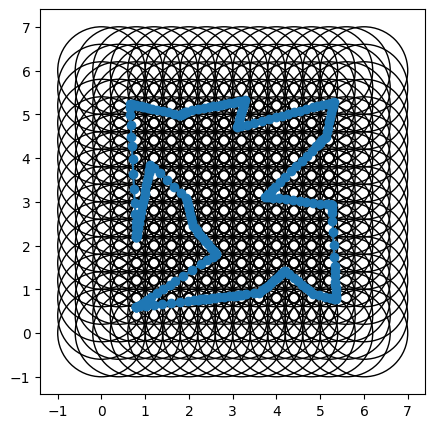

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

In [6]:
initial_solution.length()

26.523779987323

In [ ]:
timelimit = 220
num_nodes_explored = 0
ub, lb = None, None
def count(event):
    #return
    global num_nodes_explored
    global ub
    global lb
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    return
    if not event.current_node.get_relaxed_solution().is_simple():
        event.current_node.prune()
        return
        print("crossing prune!", event.get_relaxed_solution().length())
        plt.figure(figsize=(5, 5))
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit, branching="ChFarthestCircleSimplifying")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [ ]:
num_nodes_explored, lb, ub